In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
data=pd.read_csv('C:\\Users\\csstf107\\Desktop\\data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [5]:
y=data['Survived']
x=data.drop(['Survived'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate=train_test_split(x,y,random_state=101,stratify=y,test_size=.25)


In [9]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [10]:
y_validate.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


In [12]:
dt_model=DecisionTreeClassifier(random_state=10)

In [13]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [15]:
dt_model.score(x_train,y_train)

0.9880239520958084

In [16]:
dt_model.score(x_validate,y_validate)

0.7533632286995515

In [18]:
dt_model.predict(x_validate)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [25]:
y_pred=dt_model.predict_proba(x_validate)[:,1]

In [30]:
y_new=[]
for i in range(len(y_pred)):
    if y_pred[i]<.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [34]:
y_val=[]
for i in range(len(y_validate)):
    if y_validate[i]<.7:
        y_val.append(0)
    else:
        y_val.append(1)

In [35]:
#y_new=pd.DataFrame(y_new)
#print(y_validate)
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_new)

1.0

In [42]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    validation_accuracy.append(dt_model.score(x_validate,y_new))

In [44]:
frame=pd.DataFrame({'max_depth':range(1,10),"train_acc":train_accuracy,"validation_acc":validation_accuracy})
frame.head()

,max_depth,train_acc,validation_acc
0,1,0.803892,0.811659
1,2,0.803892,0.811659
2,3,0.830838,0.834081
3,4,0.847305,0.847534
4,5,0.847305,0.847534


No handles with labels found to put in legend.


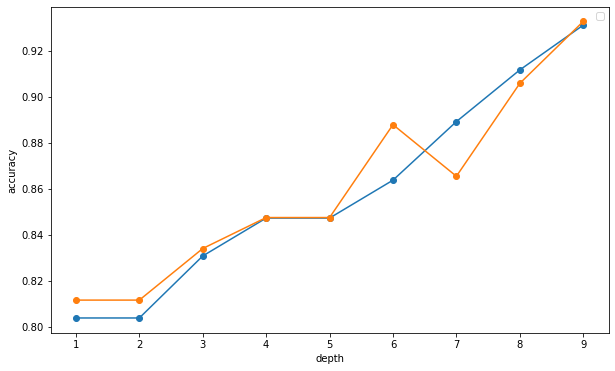

In [45]:
plt.figure(figsize=(10,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['validation_acc'],marker='o')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()

In [46]:
dt_model=DecisionTreeClassifier(max_depth=9,random_state=10,max_leaf_nodes=25)
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

0.8802395209580839

In [49]:

dt_model.score(x_validate,y_new)

0.8923766816143498